### 課題4

以下の小問の(1)-(2)を解答すること．(3)は任意（できるだけやってみる方が望ましい．）．

1. ResNet50, Xception, MobileNetで，3枚以上の画像について，それぞれ1000種類認識を行うこと．
1. 下記のデータセットで，VGG16をfine-tuningして，画像分類を行うこと．データ拡張しない場合と，する場合を比較せよ．
1. (2)と同様に, MobileNet, Xception, ResNet50など，別のネットワークで fine-tuningして，学習時間と精度を比較せよ．

(2), (3)は以下のデータセットのどれかを利用すること．UEC-Food20 のみ20種類で，あとは10種類です．すべて1クラス100枚ずつ入っています．  
（自分で用意可能な人は，自分で用意したものを利用してもよい．各カテゴリ100枚10クラス以上用意せよ．）

 * UEC-Food20 
 * UEC-Food10  (上記の10種類版．メモリが足りない場合にどうぞ．)
 * FlickrMaterialDatabase(FMD) 
 


## 課題4.1 ResNet50, Xception, MobileNetで，3枚以上の画像について，それぞれ1000種類認識を行う


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# カレントディレクトリの読み込みとカレントディレクトリへの移動
import sys
sys.path.append(f'/content/drive/My Drive/system/')
import os
os.chdir(f'/content/drive/My Drive/system/myanswer')

In [ ]:
import numpy as np
import keras as keras
from keras.preprocessing import image

In [ ]:
# ResNet50 による 1000種類分類
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50 
from keras.applications.resnet50 import decode_predictions as decode_predictions_resnet50

# Xception による 1000種類分類
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as preprocess_input_xception
from keras.applications.xception import decode_predictions as decode_predictions_xception

# MobileNet による 1000種類分類
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input as preprocess_input_mobilenet
from keras.applications.mobilenet import decode_predictions as decode_predictions_mobilenet

In [ ]:
def classify_images_by_predtrained_model(model_name, img_path):
  
    if model_name == "resnet50":
      print("input image is {} for {}".format(os.path.splitext(os.path.basename(img_path))[0], model_name))
      # include_top=False とすると全結合手前までの読み込みになる．特徴抽出に利用する．
      model = ResNet50(weights='imagenet', include_top=True)
      img = image.load_img(img_path, target_size=(224, 224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input_resnet50(x)
      preds= model.predict(x)
      # top-5 まで表示．
      print('Predicted by {} : {}\n'.format(model_name, decode_predictions_resnet50(preds, top=5)[0])) 
    
    elif model_name == "xception":
      print("input image is {} for {}".format(os.path.splitext(os.path.basename(img_path))[0], model_name))
      model = Xception(weights="imagenet", include_top=True)
      img = image.load_img(img_path, target_size=(299, 299))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input_xception(x)
      preds= model.predict(x)
      print('Predicted by {} : {}\n'.format(model_name, decode_predictions_xception(preds, top=5)[0])) 

    elif model_name == "mobilenet":
      print("input image is {} for {}".format(os.path.splitext(os.path.basename(img_path))[0], model_name))
      model = MobileNet(weights="imagenet", include_top=True)
      img = image.load_img(img_path, target_size=(224, 224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input_mobilenet(x)
      preds= model.predict(x)
      print('Predicted by {} : {}\n'.format(model_name, decode_predictions_mobilenet(preds, top=5)[0])) 

Imagenetの1000クラス内に含まれている画像のうち，以下の3クラスの画像それぞれ1枚分を分類用の画像として利用する
* Dugong (ジュゴン)
* quill, quill pen（羽根ペン）
* winebottle (ワインボトル)

In [ ]:
import itertools
model_list = ["resnet50", "xception", "mobilenet"]
img_path_list = ["../figure/dugong.jpg", "../figure/quillpen.jpg", "../figure/winebottle.jpg"]
for model_name, img_path in itertools.product(model_list, img_path_list):
    classify_images_by_predtrained_model(model_name=model_name, img_path=img_path)


input image is dugong for resnet50
Predicted by resnet50 : [('n02074367', 'dugong', 0.99983823), ('n01496331', 'electric_ray', 0.00014205932), ('n01664065', 'loggerhead', 5.8430014e-06), ('n02134084', 'ice_bear', 4.4180897e-06), ('n01665541', 'leatherback_turtle', 2.0253742e-06)]

input image is quillpen for resnet50
Predicted by resnet50 : [('n04033901', 'quill', 0.99999726), ('n03658185', 'letter_opener', 1.5517799e-06), ('n03000684', 'chain_saw', 4.656001e-07), ('n03908714', 'pencil_sharpener', 1.3495378e-07), ('n04259630', 'sombrero', 1.1209314e-07)]

input image is winebottle for resnet50
Predicted by resnet50 : [('n04591713', 'wine_bottle', 0.99093854), ('n07892512', 'red_wine', 0.008875542), ('n03109150', 'corkscrew', 9.663793e-05), ('n03388183', 'fountain_pen', 3.979436e-05), ('n04008634', 'projectile', 1.230255e-05)]

input image is dugong for xception
Predicted by xception : [('n02074367', 'dugong', 0.94668263), ('n01440764', 'tench', 0.0009252047), ('n01819313', 'sulphur-cre

課題4.2  下記のデータセットで，VGG16をfine-tuningして，画像分類を行うこと．データ拡張しない場合と，する場合を比較せよ．

 * UEC-Food10 を利用

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16

In [ ]:
import glob

def load_images(model_name="vgg16", img_name="uecfood10", n_class=10, num_per_class=100, in_size=224):
    # imglist に 10クラス1000枚を読み込みます．
    if img_name == "uecfood20":
      imglist = glob.glob('../figure/{}/*/*.jpg'.format(img_name))
      n_class = 20
    else:
      imglist = glob.glob('../figure/{}/*/*.jpg'.format(img_name))

    num = num_per_class * n_class

    # 1000枚画像をimgsに読み込みます．
    imgs = np.empty((0,in_size,in_size,3), dtype=np.float32)
    
    if model_name == "vgg16":
      for i, img_path in enumerate(imglist):
          if i%100==0:
              print("reading {}th image".format(i))
          img = image.load_img(img_path, target_size=(in_size, in_size))
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)
          x = preprocess_input_vgg16(x)
          imgs = np.vstack((imgs,x))
      print("loaded image shape by {}: {}".format(model_name, imgs.shape))
    
    elif model_name == "resnet50":
      for i, img_path in enumerate(imglist):
          if i%100==0:
              print("reading {}th image".format(i))
          img = image.load_img(img_path, target_size=(in_size, in_size))
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)
          x = preprocess_input_resnet50(x)
          imgs = np.vstack((imgs,x))
      print("loaded image shape by {}: {}".format(model_name, imgs.shape))

    elif model_name == "xception":
      for i, img_path in enumerate(imglist):
          if i%100==0:
              print("reading {}th image".format(i))
          img = image.load_img(img_path, target_size=(in_size, in_size))
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)
          x = preprocess_input_xception(x)
          imgs = np.vstack((imgs,x))
      print("loaded image shape by {}: {}".format(model_name, imgs.shape))

    elif model_name == "mobilenet":
      for i, img_path in enumerate(imglist):
          if i%100==0:
              print("reading {}th image".format(i))
          img = image.load_img(img_path, target_size=(in_size, in_size))
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)
          x = preprocess_input_mobilenet(x)
          imgs = np.vstack((imgs,x))
      print("loaded image shape by {}: {}".format(model_name, imgs.shape))

    return imgs


In [ ]:
def create_dataset(img_tensor=None, img_name="uecfood10", n_class=10, num_per_class=100):
    label = np.empty((0),int)
   
    if img_name == "uecfood20":
      n_class = 20

    for i in range(n_class):
        label = np.append(label,i*np.ones(num_per_class,dtype=np.int))

    num = num_per_class * n_class

    # indexの作成．5で割って余る数がtestのindex, そうでない数がtrainのindex.
    # つまり，train:text=8:2 とする．
    train_idx=[n for n in range(num) if n%5!=0]
    test_idx =[n for n in range(num) if n%5==0]

    X_train = img_tensor[train_idx]
    X_test =img_tensor[test_idx]

    # 1 of Kのベクトルに変換
    Y_train = keras.utils.to_categorical(label[train_idx], n_class)
    Y_test = keras.utils.to_categorical(label[test_idx],n_class)

    return X_train, Y_train, X_test, Y_test

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.models import Model

def complie_finetuned_model(model_name="vgg16", img_name="uecfood10", in_size=224, n_class=10):
    input_tensor = Input(shape=(in_size, in_size, 3))
    
    if model_name == "vgg16":
        model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
        # FC層の作成 最終層のエレメント数はクラス数と同じ
        top_model = Sequential()
        top_model.add(Flatten(input_shape=model.output_shape[1:]))
        top_model.add(Dense(256, activation='relu'))
        top_model.add(Dropout(0.5))
        top_model.add(Dense(n_class, activation='softmax'))

        vgg16_model = Model(inputs=input_tensor, outputs=top_model(model.output))
        # 最後のconv層の直前までの層をfreeze
        #for layer in vgg16_model.layers[:16]:
        for layer in vgg16_model.layers[:8]:
            layer.trainable = False

        # モデルのcompile. fine-tunining時は学習率は小さめにする．lr=0.0001 とする．
        vgg16_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
        #          optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
        
        return vgg16_model
    
    elif model_name == "resnet50":
        model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
        top_model = Sequential()
        top_model.add(Flatten(input_shape=model.output_shape[1:]))
        top_model.add(Dense(256, activation='relu'))
        top_model.add(Dropout(0.5))
        top_model.add(Dense(n_class, activation='softmax'))
        resnet50_model = Model(inputs=input_tensor, outputs=top_model(model.output))
        
        for layer in resnet50_model.layers[:8]:
          layer.trainable = False

        resnet50_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
        #          optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
        
        return resnet50_model

    elif model_name == "xception":
        model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)
        top_model = Sequential()
        top_model.add(Flatten(input_shape=model.output_shape[1:]))
        top_model.add(Dense(256, activation='relu'))
        top_model.add(Dropout(0.5))
        top_model.add(Dense(n_class, activation='softmax'))
        xception_model = Model(inputs=input_tensor, outputs=top_model(model.output))
          
        for layer in xception_model.layers[:8]:
          layer.trainable = False

        xception_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
        #          optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
        
        return xception_model

    elif model_name == "mobilenet":
        model = MobileNet(weights='imagenet', include_top=False, input_tensor=input_tensor)
        top_model = Sequential()
        top_model.add(Flatten(input_shape=model.output_shape[1:]))
        top_model.add(Dense(256, activation='relu'))
        top_model.add(Dropout(0.5))
        top_model.add(Dense(n_class, activation='softmax'))
        mobilenet_model = Model(inputs=input_tensor, outputs=top_model(model.output))
        
        for layer in mobilenet_model.layers[:8]:
          layer.trainable = False

        mobilenet_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
        #          optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
        
        return mobilenet_model

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
# callback のクラス ShowGraphを定義
class ShowGraph(keras.callbacks.Callback):
    def __init__(self,max_epoch, model_name, is_augmentation):
        # 表示エリアの設定
        self.fig=plt.figure(figsize=(8,4))
        self.fig1 = self.fig.add_subplot(121)
        self.fig1.axis([0, max_epoch, 0.5, 1.0])
        self.fig1.set_title('accuracy')
        self.fig1.set_ylabel('accuracy')
        self.fig1.set_xlabel('epoch')
        self.fig2 = self.fig.add_subplot(122)
        self.fig2.axis([0, max_epoch, 0, 5])
        self.fig2.set_title('loss')
        self.fig2.set_ylabel('loss')
        self.fig2.set_xlabel('epoch')
        self.max_epoch=max_epoch
        self.start=time.time()
        self.model_name = model_name
        self.is_augmentation = is_augmentation
    
    # 学習の最初に呼び出される
    def on_train_begin(self, logs={}):
        self.losses=[]
        self.losses_val=[]
        self.acc=[]
        self.acc_val=[]
        self.n_epoch=[]
    
    # 各epochの最後に呼び出される
    def on_epoch_end(self, epoch, logs={}):
        self.n_epoch.append(epoch)
        self.acc.append(logs.get('accuracy'))
        self.acc_val.append(logs.get('val_accuracy'))     
        self.losses.append(logs.get('loss'))
        self.losses_val.append(logs.get('val_loss'))     
        self.test_acc=logs.get('val_accuracy')
    
        display.clear_output(wait = True)
        self.fig1.plot(self.n_epoch,self.acc,"b")
        self.fig1.plot(self.n_epoch,self.acc_val,"r")
        self.fig1.legend(['train', 'test'], loc='upper left')
        self.fig2.plot(self.n_epoch,self.losses,"b")
        self.fig2.plot(self.n_epoch,self.losses_val,"r")
        self.fig2.legend(['train', 'test'], loc='upper right')
        display.display(self.fig)
        
    # デストラクタ(オブジェクトが消滅時に実行される)  
    # グラフが２つ表示されるのを防止．さらに最終val acc値の表示．
    def __del__(self):
        display.clear_output(wait = True)
        # 実行結果の画像を保存
        self.fig.savefig("../result/pretrained_model/result_{}_isaugmentation_{}.png".format(self.model_name, self.is_augmentation),
                         transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.0)
        print("final validation_accuracy: ",self.test_acc) 
        print('Time: ',time.time()-self.start)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def execute_inference(X_train, Y_train, X_test, Y_test, model, model_name, augmentation=False):
    # +-0.2倍の拡大縮小，+-20度までの回転，+-0.2の縦横シフト，水平反転
    # によるデータ拡張
    datagen = ImageDataGenerator(
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator()

    num_epoch=100
    batch_size=64
    show_graph=ShowGraph(max_epoch=num_epoch, 
                         model_name=model_name,
                         is_augmentation = str(augmentation)
                         )
    # 適応的な学習率の変化．5 epoch val_lossが改善しない場合は，学習率を0.1下げる．最小の学習率は 0.00001．
    reduce_lr =keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00001)
    # EarlyStopping (早期終了)のコールバック  20epoch val_lossが改善しない場合は打ち切り
    earlystop =keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto')
    
    if augmentation:
        # データ拡張あり
        model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), epochs=num_epoch+1, steps_per_epoch=len(X_train)//batch_size,
                            validation_steps=len(X_test)//batch_size,  validation_data=test_datagen.flow(X_test,Y_test, batch_size=batch_size), 
                            verbose=0, callbacks=[show_graph, reduce_lr, earlystop])
    else:
        # データ拡張なし
        model.fit(X_train, Y_train, epochs=num_epoch+1, validation_data=(X_test,Y_test), batch_size=64, verbose=0, callbacks=[show_graph, reduce_lr, earlystop])
    del show_graph

In [ ]:
import pickle
def save_image_tensor(model_name="vgg16", img_name="uecfood10"):
    if os.path.exists("../pickle/{}_{}.pickle".format(img_name, model_name)):
        with open('../pickle/{}_{}.pickle'.format(img_name, model_name), 'rb') as p:
          img_tensor = pickle.load(p)
    else:
        img_tensor = load_images(model_name=model_name, img_name=img_name)
        with open('../pickle/{}_{}.pickle'.format(img_name, model_name), 'wb') as p:
          pickle.dump(img_tensor , p)
    return img_tensor

In [ ]:
img_tensor_vgg16 = save_image_tensor()

In [ ]:
X_train, Y_train, X_test, Y_test = create_dataset(img_tensor=img_tensor_vgg16)

In [ ]:
vgg16_model = complie_finetuned_model()

final validation_accuracy:  0.8349999785423279
Time:  341.74656677246094


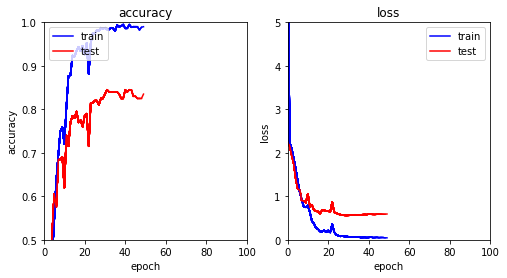

In [ ]:
# データ拡張なしで画像認識を行う
execute_inference(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, 
                  model=vgg16_model, model_name="vgg16", augmentation=False)

final validation_accuracy:  0.8697916865348816
Time:  827.3449523448944


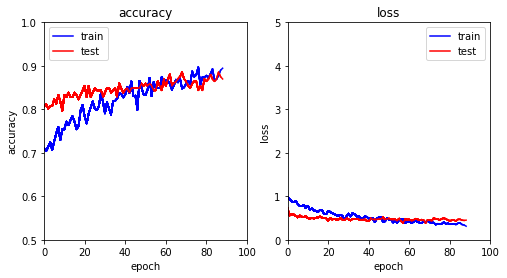

In [ ]:
# データ拡張ありで画像認識を行う
execute_inference(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, 
                  model=vgg16_model, model_name="vgg16", augmentation=True)

課題4.3   (2)と同様に, MobileNet, Xception, ResNet50など，別のネットワークで fine-tuningして，学習時間と精度を比較せよ．

 * データセット: UEC-Food10 モデル: ResNet50 とする

In [ ]:
 img_tensor_resnet50 = save_image_tensor(model_name="resnet50")

In [ ]:
X_train_resnet50, Y_train_resnet50, X_test_resnet50, Y_test_resnet50 = create_dataset(img_tensor=img_tensor_resnet50)

In [ ]:
resnet50_model = complie_finetuned_model(model_name="resnet50")

final validation_accuracy:  0.8799999952316284
Time:  338.70229029655457


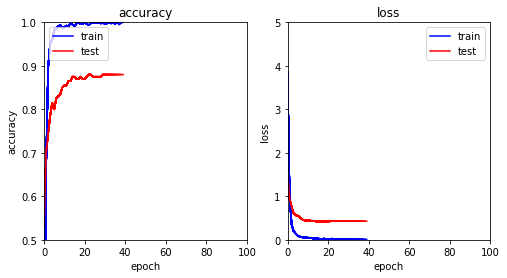

In [ ]:
# データ拡張なしで画像認識を行う
execute_inference(X_train=X_train_resnet50, Y_train=Y_train_resnet50, 
                  X_test=X_test_resnet50, Y_test=Y_test_resnet50, 
                  model=resnet50_model, model_name="resnet50", augmentation=False)

final validation_accuracy:  0.890625
Time:  709.5771000385284


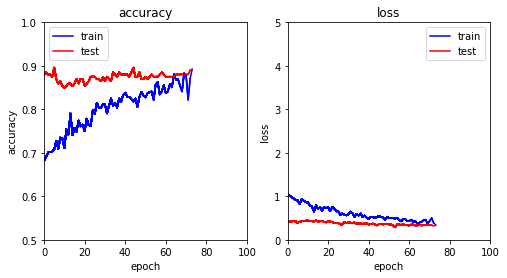

In [ ]:
# データ拡張ありで画像認識を行う
execute_inference(X_train=X_train_resnet50, Y_train=Y_train_resnet50, 
                  X_test=X_test_resnet50, Y_test=Y_test_resnet50, 
                  model=resnet50_model, model_name="resnet50", augmentation=True)

 * データセット: UEC-Food10 モデル: Xception とする

In [ ]:
img_tensor_xception = save_image_tensor(model_name="xception")

In [ ]:
X_train_xception, Y_train_xception, X_test_xception, Y_test_xception = create_dataset(img_tensor=img_tensor_xception)

In [ ]:
xception_model = complie_finetuned_model(model_name="xception")

83689472/83683744 [==============================] - 1s 0us/step


final validation_accuracy:  0.8899999856948853
Time:  1431.8787145614624


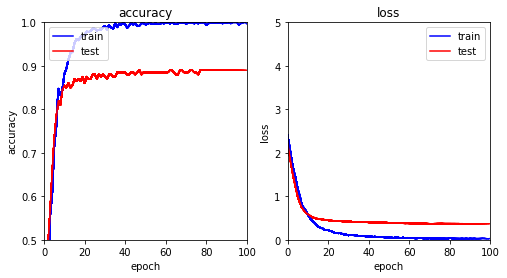

In [ ]:
# データ拡張なしで画像認識を行う
execute_inference(X_train=X_train_xception, Y_train=Y_train_xception, 
                  X_test=X_test_xception, Y_test=Y_test_xception, 
                  model=xception_model, model_name="xception", augmentation=False)

final validation_accuracy:  0.890625
Time:  292.7241189479828


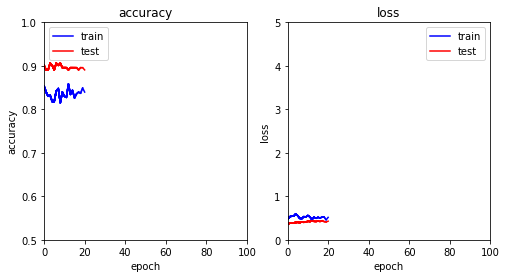

In [ ]:
# データ拡張ありで画像認識を行う
execute_inference(X_train=X_train_xception, Y_train=Y_train_xception, 
                  X_test=X_test_xception, Y_test=Y_test_xception, 
                  model=xception_model, model_name="xception", augmentation=True)

 * データセット: UEC-Food10 モデル: Mobilenet とする

In [ ]:
img_tensor_mobilenet = save_image_tensor(model_name="mobilenet")

In [ ]:
X_train_mobilenet, Y_train_mobilenet, X_test_mobilenet, Y_test_mobilenet = create_dataset(img_tensor=img_tensor_mobilenet)

In [ ]:
mobilenet_model = complie_finetuned_model(model_name="mobilenet")

final validation_accuracy:  0.8450000286102295
Time:  162.89241409301758


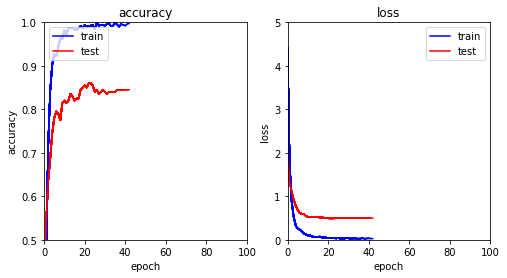

In [ ]:
# データ拡張なしで画像認識を行う
execute_inference(X_train=X_train_mobilenet, Y_train=Y_train_mobilenet, 
                  X_test=X_test_mobilenet, Y_test=Y_test_mobilenet, 
                  model=mobilenet_model, model_name="mobilenet", augmentation=False)

final validation_accuracy:  0.8541666865348816
Time:  484.63807559013367


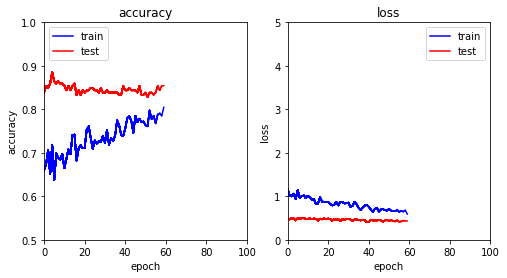

In [ ]:
# データ拡張ありで画像認識を行う
execute_inference(X_train=X_train_mobilenet, Y_train=Y_train_mobilenet, 
                  X_test=X_test_mobilenet, Y_test=Y_test_mobilenet, 
                  model=mobilenet_model, model_name="mobilenet", augmentation=True)